In [12]:
#Import Libraries
#Import Libraries
import joblib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sklearn
from tqdm import tqdm
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
#import libraries
import numpy as np
import pandas as pd
import numpy.ma as ma
import rasterio
from rasterio.fill import fillnodata
from rasterio.warp import reproject
from rasterio.enums import Resampling
from osgeo import gdal
import os
import glob
from multiprocessing import Pool
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import fnmatch
from osgeo import gdal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rasterio, matplotlib
from rasterio import features
from geopandas import GeoDataFrame
from shapely.geometry import Point
# from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# rcParams ['figure.figsize'] = 10,8

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import catboost as ctb
from sklearn.svm import SVR
from sklearn import ensemble

import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import label_binarize

from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [10]:
Scenario_Settings = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\Year_Wise_Scenario_Settings_With_GCMs.h5')
Scenario_Settings['tif_files'] = Scenario_Settings['scenarios'].str.replace('_AUS.csv','').astype(str)+'_'+Scenario_Settings['Year'].astype(str)+'.tif'

Wanted = Scenario_Settings[(Scenario_Settings['Yield Increase Crops'] >=1.78) & (Scenario_Settings['Carbon Price (AU$/tonne CO2)']>=100) & (Scenario_Settings['Hurdle Rate']>=1) & (Scenario_Settings['Yield Increase Trees']>=1.15)
                          & (Scenario_Settings['Biodiversity Fund (% levy on carbon plantings)']>=0.09) & (Scenario_Settings['Livestock ($)']>=2.19)
                          & (Scenario_Settings['Electricity Price (AU$/MWh)']>=50)& (Scenario_Settings['Oil Price (AUCents/Litre)']>=145)] 
#    & (Scenario_Settings['Crop Price (AU$)']>=1.84)  ]
Wanted

c:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Year,scenarios,Scenario Number,Yield Increase Crops,Yield Increase Trees,Crop Price (AU$),Livestock ($),Carbon Price (AU$/tonne CO2),Oil Price (AUCents/Litre),Electricity Price (AU$/MWh),...,Hurdle Rate,Constraint Setting,CE2,MPI,MR5,H3,L1,M2,M3,tif_files
2803,2049,S117_L1_MPI-ESM-LR_H_Bio_1x_C_AUS.csv,S117,2.08,1.36,1.7351,2.4267,191.43,159.3535,115.6156,...,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,S117_L1_MPI-ESM-LR_H_Bio_1x_C_2049.tif
2805,2046,S153_L1_CanESM2_H_Bio_1x_C_AUS.csv,S153,1.99,1.33,1.6780,2.3076,168.64,158.4937,118.0504,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,S153_L1_CanESM2_H_Bio_1x_C_2046.tif
2811,2049,S189_L1_MIROC5_H_Bio_1x_C_AUS.csv,S189,2.08,1.36,1.7349,2.4264,191.43,159.3597,115.6156,...,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S189_L1_MIROC5_H_Bio_1x_C_2049.tif
2812,2050,S189_L1_MIROC5_H_Bio_1x_C_AUS.csv,S189,2.11,1.37,1.7532,2.4663,199.74,159.6700,116.0343,...,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S189_L1_MIROC5_H_Bio_1x_C_2050.tif
2845,2044,S222_L1_MPI-ESM-LR_H_Bal_2x_U_AUS.csv,S222,1.93,1.31,1.6379,2.2290,155.08,158.0810,118.0132,...,2,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,S222_L1_MPI-ESM-LR_H_Bal_2x_U_2044.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21617,2046,S621_L1_MIROC5_H_Bio_5x_C_AUS.csv,S621,1.99,1.33,1.6779,2.3076,168.64,158.5317,118.0504,...,5,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S621_L1_MIROC5_H_Bio_5x_C_2046.tif
21618,2047,S621_L1_MIROC5_H_Bio_5x_C_AUS.csv,S621,2.02,1.34,1.6973,2.3470,175.88,158.7737,117.9823,...,5,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S621_L1_MIROC5_H_Bio_5x_C_2047.tif
21619,2048,S621_L1_MIROC5_H_Bio_5x_C_AUS.csv,S621,2.05,1.35,1.7163,2.3866,183.48,159.0589,118.3006,...,5,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S621_L1_MIROC5_H_Bio_5x_C_2048.tif
21620,2049,S621_L1_MIROC5_H_Bio_5x_C_AUS.csv,S621,2.08,1.36,1.7349,2.4264,191.43,159.3597,115.6156,...,5,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,S621_L1_MIROC5_H_Bio_5x_C_2049.tif


In [35]:
#Considering As Classification Problem testing different models one a sample dataset to find out best model


def run_models(Scenario, X_train, y_train, X_test, y_test):
    dfs = []
    
    models = [
        ("Model 1 - MLP", create_mlp_model()),
        ("Model 2 - MLP-BatchNormalisation", create_mlp_model_with_normalization()),
        ("Model 3 - RNN", create_rnn_model()),
        ("Model 4 - ANN", create_ann_model()),
        ("Model 5 - ANN-With-DropOut", create_ann_model_with_dropout()),
        ("Model 6 - Gated Recurrent Unit", create_gru_model()),
        ("Model 7 - CNN", create_cnn_model()) ]
         
    for name, model in models:
        start_time = datetime.now()
        model.fit(X_train, y_train)
        end_time = datetime.now()
        training_time = (end_time - start_time).total_seconds()

        start_time = datetime.now()
        y_pred = model.predict(X_test)
        end_time = datetime.now()
        testing_time = (end_time - start_time).total_seconds()

        # Calculate classification metrics
        accuracy = metrics.accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
        precision = metrics.precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
        recall = metrics.recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
        f1_score = metrics.f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

        # Confusion Matrix
        confusion = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
        


        # Specificity (True Negative Rate) for each class
        num_classes = len(np.unique(y_test))
        specificity_per_class = []
        for class_idx in range(num_classes):
            true_negatives = np.sum(np.delete(confusion, class_idx, axis=0).T[class_idx])
            false_positives = np.sum(np.delete(confusion, class_idx, axis=1)[class_idx])
            specificity_class = true_negatives / (true_negatives + false_positives)
            specificity_per_class.append(specificity_class)

        # Average specificity across all classes
        average_specificity = np.mean(specificity_per_class)

        # Obtain unique classes from your data
        unique_classes = np.unique(y_test)

        # Cohen's Kappa
        kappa = cohen_kappa_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))


        this_df = pd.DataFrame()
        this_df['model'] = [name]
        this_df['training_time'] = [training_time]
        this_df['testing_time'] = [testing_time]
        this_df['model_structure'] = [model.summary()]
        this_df['Accuracy'] = [accuracy]
        this_df['Precision'] = [precision]
        this_df['Recall'] = [recall]
        this_df['F1-Score'] = [f1_score]
        this_df['Specificity'] = [average_specificity]
        this_df['Cohen_Kappa'] = [kappa]
        this_df['MCC'] = [mcc]
        
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)
    final.to_csv(str(Scenario) + "_classification_results.csv", index=False)
    return final


def create_mlp_model():
    model = keras.Sequential()
    model.add(layers.Dense(300, input_dim=53, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_mlp_model_with_normalization():
    model = keras.Sequential()
    model.add(layers.Dense(300, input_dim=53, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_model():
    model = keras.Sequential()
    # Reshape input data to add a pseudo-time dimension
    model.add(layers.Reshape((53, 1), input_shape=(53,)))  # Add a pseudo-time dimension
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_rnn_model():
    model = keras.Sequential()
    # Reshape input data to add a pseudo-time dimension
    model.add(layers.Reshape((1, 53), input_shape=(53,)))  # Add a pseudo-time dimension
    model.add(layers.SimpleRNN(64))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def create_gru_model():
    model = keras.Sequential()
    # Reshape input data to add a pseudo-time dimension
    model.add(layers.Reshape((1, 53), input_shape=(53,)))  # Add a pseudo-time dimension
    model.add(layers.GRU(64))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_ann_model():
    model = keras.Sequential()
    model.add(layers.Dense(300, input_dim=53, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_ann_model_with_dropout():
    model = keras.Sequential()
    model.add(layers.Dense(300, input_dim=53, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model
         
def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match


In [37]:
#Prepared Data for Model Training.

Scenario_Settings = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\Year_Wise_Scenario_Settings_With_GCMs.h5')
Scenario_Settings['tif_files'] = Scenario_Settings['scenarios'].str.replace('_AUS.csv','').astype(str)+'_'+Scenario_Settings['Year'].astype(str)+'.tif'
arr = list(Scenario_Settings['tif_files'])
for i in tqdm(range(0, 1)):

    GCM =arr[i].split('.')[0].split('_')[2].split('-')[0]
    if (GCM == 'MPI'):
        GCM = 'MPI'
    elif (GCM == 'MIROC5'):
        GCM ='MR5'
    else:
        GCM = 'CE2'
    Year = arr[i].split('.')[0].split('_')[-1]
    if (Year == '2012' or Year == '2022'):
        Year = '2013'
    else:
        Year

    Outlook = arr[i].split('.')[0].split('_')[1]
    Scenario =arr[i].split('.')[0].split('_')[0]
#     Year = arr[i].split('.')[0].split('_')[-1]

    #Train_S100_H3_MIROC5_L_Car_1x_U_2050
    Raw_Input = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\RawPixelWiseAllInput.h5')
    Climate_Wise_Run_offs = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\'+GCM+'_'+Outlook+'_R.h5')
    Climate_Wise_Damage = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\Tree_and_Dryland_Damage_'+GCM+Outlook+'.h5')
    Scenario_Settings = pd.read_hdf('\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Input HDF5 Data\\Year_Wise_Scenario_Settings_With_GCMs.h5')
    ## Dynamic Data Preparation and Training 

    #Output from Model inserting scenario outputs from previous models (LUTO)
    inputRaster= '\\\school-les-m.shares.deakin.edu.au\\school-les-m\\Planet-A\\LUF-Modelling\\Machine-learning-model-dev\\ML-LUTO-Model\\Raw Input Data\scenario_outputs\\'+arr[i]
    r = gdal.Open(inputRaster)
    band = r.GetRasterBand(1) #bands start at one
    a = band.ReadAsArray().astype(float)
    b = a.flatten()
    #if you want to pick onle certain values. i.e. as for the masks only the values more than 0 matters as 0 means null values.
    c = b[b>0]
    (y_index, x_index) = np.nonzero(a)
    #To demonstate this compare a.shape to band.XSize and band.YSize
    (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = r.GetGeoTransform()
    x_coords = x_index * x_size + upper_left_x + (x_size / 2) #add half the cell size
    y_coords = y_index * y_size + upper_left_y + (y_size / 2) #to centre the point

    data_x = pd.DataFrame(x_coords[0:])
    data_y = pd.DataFrame(y_coords[0:])

    dataset = pd.DataFrame({'longitude': x_coords[0:], 'latitude': y_coords[0:], arr[i].split('.')[0]: c[0:]})
    # dataset = pd.DataFrame({'longitude': x_coords[0:], 'latitude': y_coords[0:]})
    dataset ['index'] = dataset.index
    # dataset.index.names=['index']
    dataset ['key'] = dataset['longitude'].round(2).astype(str)+", "+dataset['latitude'].round(2).astype(str)
    dataset.set_index('key', inplace = True)
    Scenario_Wise_Outputs = dataset[(dataset[arr[i].split('.')[0]]<255)]

    data = pd.merge(left=Raw_Input, right=Scenario_Wise_Outputs, left_on='key', right_on='key')
    
    dict = {5.0 : 'Agriculture', 6.0 : 'Agriculture', 7.0: 'Agriculture', 8.0 : 'Agriculture', 
            9.0: 'Agriculture', 10.0: 'Agriculture', 11.0: 'Agriculture', 12.0: 'Agriculture',
           13.0: 'Agriculture', 14.0: 'Agriculture', 15.0: 'Agriculture', 16.0: 'Agriculture', 17.0: 'Agriculture', 18.0:'Agriculture',
           19.0:'Agriculture', 20.0:'Agriculture', 21.0: 'Agriculture', 22.0:'Agriculture',24.0:'Agriculture',
           25.0: 'Agriculture', 31.0:'Agriculture',32.0:'Agriculture', 33.0:'Agriculture', 101.0:'Carbon Planting', 102.0:'Environmental Plantings',
           103.0:'Wheat Biofuels', 104.0: 'Wheat (Food, Biofuels)',
           105.0: 'Wheat (Food, Bioenergy)', 106.0: 'Woody Perennials (Biofuels)', 107.0: 'Woody Perennials (Bioenergy)'}

    data=data.replace({"Landuse2005": dict})
    data=data.replace({arr[i].split('.')[0]: dict})
    
    Climate_Wise_Run_offs = pd.DataFrame(Climate_Wise_Run_offs[GCM+'_'+Outlook+'_Runoff_'+Year])
    Climate_Wise_Run_offs['Index'] = Climate_Wise_Run_offs.index
    climate = pd.merge(left=data, right=Climate_Wise_Run_offs, left_on='River_basin_catchments', right_on='Index', how='left')

    Climate_Wise_Damage['Index'] = Climate_Wise_Damage.index
    c = Climate_Wise_Damage[[GCM+Outlook+'_Ag_dryland_damage_'+Year, GCM+Outlook+'_Tree_damage_'+Year, 'Index']]
    p = pd.merge(left=climate, right=c, left_on='rid', right_on='Index')
    
    Scenario_Settings = Scenario_Settings[Scenario_Settings['Year'] == int(Year)]
    Scenario_Settings = Scenario_Settings[Scenario_Settings['Scenario Number'] == Scenario]
    p['Settings'] = Scenario
    data1 = pd.merge(left=p, right=Scenario_Settings, left_on='Settings', right_on='Scenario Number')
    Training = data1.drop(['longitude','latitude','index', 'STE_NAME16', 'key','Index_x','Index_y', 'Settings', 'Year', 'scenarios', 'Scenario Number','CE2', 'MPI', 'MR5', 'H3', 'L1', 'M2', 'M3'], axis= 1)
    
    oe_style = OneHotEncoder()
    BaseLanduse = oe_style.fit_transform(Training[['Landuse2005']])
    BaseLanduse = pd.DataFrame(BaseLanduse.toarray(), columns=oe_style.categories_)

    # subset = subset.join(CS)
    data4 = Training.merge(BaseLanduse,left_index=True, right_index = True)

   
    training =  data4.drop(['Landuse2005'], axis =1)
    training.columns = ['X','Y','rid','Area_Cost', 'Area_Cost5', 'greenhouse gas emissions (kgCO2/ha/year)',
       'Fixed_depriciation_cost', 'Fixed_depriciation_cost_5',
       'Fixed_labour_costs_x', 'Fixed_labour_costs_y', 'Fixed_operating_costs',
       'Fixed_operating_costs_5', 'Primary_price_of_commodity',
       'Primary_price_of_commodity_5', 'Secondary_price_of_commodity',
       'Quantity_produced_t_ha_or_DSE_ha', 'Livestock_disposals',
       'Quantity_costs', 'Quantity_costs_5', 'Water_delivery_costs',
       'Class_C_stressed_catchments', 'Class_D_stressed_catchments',
       'Dryland_agriculture_mask', 'Area_of_agriculture_per_cell',
       'Irrigated_agriculture_mask', 'Mask_of_northern_Murray_Darling_Basin',
       'Mask_of_southern_Murray_Darling_Basin',
       'Biofuels_wheat_yield_grain (t/ha)', 'Biofuels_wheat_stubble (t/ha)',
       'Carbon_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Environmental_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Woody_perennials_plantings (t/ha)', 'Biodiversity_priority_layer',
       'Establishment_costs_for_woody_perennials_plantings',
       'Establishment_costs_for_carbon_plantings',
       'Establishment_costs_for_enviromental_plantings',
       'Clusters_cells_in_study_area_using_costs_and_commodity_class',
       'Adjustment_for_fire_and_risk_CP', 'Adjustment_for_fire_and_risk_EP',
       'River_basin_catchments', 'Interceptions_of_rainfall_run_off(>600 mm)',
       'Irrigated_water_requirements(ML/ha)',
       'Output', 'Runoff',
       'Ag_dryland_damage', 'Tree_damage',
       'Yield Increase Crops', 'Yield Increase Trees', 'Crop Price (AU$)',
       'Livestock ($)', 'Carbon Price (AU$/tonne CO2)',
       'Oil Price (AUCents/Litre)', 'Electricity Price (AU$/MWh)',
       'Biodiversity Fund (% levy on carbon plantings)', 'Hurdle Rate',
       'Constraint Setting', 'In_Agricultural']
    
    all_list = []

    all_list.append(pd.get_dummies(training['Output']))

    training  = training[['X','Y','rid','Area_Cost', 'Area_Cost5', 'greenhouse gas emissions (kgCO2/ha/year)',
       'Fixed_depriciation_cost', 'Fixed_depriciation_cost_5',
       'Fixed_labour_costs_x', 'Fixed_labour_costs_y', 'Fixed_operating_costs',
       'Fixed_operating_costs_5', 'Primary_price_of_commodity',
       'Primary_price_of_commodity_5', 'Secondary_price_of_commodity',
       'Quantity_produced_t_ha_or_DSE_ha', 'Livestock_disposals',
       'Quantity_costs', 'Quantity_costs_5', 'Water_delivery_costs',
       'Class_C_stressed_catchments', 'Class_D_stressed_catchments',
       'Dryland_agriculture_mask', 'Area_of_agriculture_per_cell',
       'Irrigated_agriculture_mask', 'Mask_of_northern_Murray_Darling_Basin',
       'Mask_of_southern_Murray_Darling_Basin',
       'Biofuels_wheat_yield_grain (t/ha)', 'Biofuels_wheat_stubble (t/ha)',
       'Carbon_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Environmental_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Woody_perennials_plantings (t/ha)', 'Biodiversity_priority_layer',
       'Establishment_costs_for_woody_perennials_plantings',
       'Establishment_costs_for_carbon_plantings',
       'Establishment_costs_for_enviromental_plantings',
       'Clusters_cells_in_study_area_using_costs_and_commodity_class',
       'Adjustment_for_fire_and_risk_CP', 'Adjustment_for_fire_and_risk_EP',
       'River_basin_catchments', 'Interceptions_of_rainfall_run_off(>600 mm)',
       'Irrigated_water_requirements(ML/ha)', 'Runoff',
       'Ag_dryland_damage', 'Tree_damage',
       'Yield Increase Crops', 'Yield Increase Trees', 'Crop Price (AU$)',
       'Livestock ($)', 'Carbon Price (AU$/tonne CO2)',
       'Oil Price (AUCents/Litre)', 'Electricity Price (AU$/MWh)',
       'Biodiversity Fund (% levy on carbon plantings)', 'Hurdle Rate',
       'Constraint Setting', 'In_Agricultural']]
    training.columns  = ['X','Y','rid','Area_Cost', 'Area_Cost5', 'greenhouse gas emissions (kgCO2/ha/year)',
       'Fixed_depriciation_cost', 'Fixed_depriciation_cost_5',
       'Fixed_labour_costs_x', 'Fixed_labour_costs_y', 'Fixed_operating_costs',
       'Fixed_operating_costs_5', 'Primary_price_of_commodity',
       'Primary_price_of_commodity_5', 'Secondary_price_of_commodity',
       'Quantity_produced_t_ha_or_DSE_ha', 'Livestock_disposals',
       'Quantity_costs', 'Quantity_costs_5', 'Water_delivery_costs',
       'Class_C_stressed_catchments', 'Class_D_stressed_catchments',
       'Dryland_agriculture_mask', 'Area_of_agriculture_per_cell',
       'Irrigated_agriculture_mask', 'Mask_of_northern_Murray_Darling_Basin',
       'Mask_of_southern_Murray_Darling_Basin',
       'Biofuels_wheat_yield_grain (t/ha)', 'Biofuels_wheat_stubble (t/ha)',
       'Carbon_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Environmental_plantings_average_annual_sequestered (tCO2/ha/yr)',
       'Woody_perennials_plantings (t/ha)', 'Biodiversity_priority_layer',
       'Establishment_costs_for_woody_perennials_plantings',
       'Establishment_costs_for_carbon_plantings',
       'Establishment_costs_for_enviromental_plantings',
       'Clusters_cells_in_study_area_using_costs_and_commodity_class',
       'Adjustment_for_fire_and_risk_CP', 'Adjustment_for_fire_and_risk_EP',
       'River_basin_catchments', 'Interceptions_of_rainfall_run_off(>600 mm)',
       'Irrigated_water_requirements(ML/ha)', 'Runoff',
       'Ag_dryland_damage', 'Tree_damage',
       'Yield Increase Crops', 'Yield Increase Trees', 'Crop Price (AU$)',
       'Livestock ($)', 'Carbon Price (AU$/tonne CO2)',
       'Oil Price (AUCents/Litre)', 'Electricity Price (AU$/MWh)',
       'Biodiversity Fund (% levy on carbon plantings)', 'Hurdle Rate',
       'Constraint Setting', 'In_Agricultural']

    all_list.append(training)
    training = pd.concat(all_list, axis=1)
    list_A = ['Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)']
    list_B = training.columns[0:31]
    non_match = non_match_elements(list_A, list_B)
    for j in range(0,len(non_match)):
        training[non_match[j]]=0
training

c:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [03:23<00:00, 203.79s/it]


,Agriculture,Environmental Plantings,"Wheat (Food, Biofuels)",X,Y,rid,Area_Cost,Area_Cost5,greenhouse gas emissions (kgCO2/ha/year),Fixed_depriciation_cost,...,Electricity Price (AU$/MWh),Biodiversity Fund (% levy on carbon plantings),Hurdle Rate,Constraint Setting,In_Agricultural,Carbon Planting,Wheat Biofuels,"Wheat (Food, Bioenergy)",Woody Perennials (Biofuels),Woody Perennials (Bioenergy)
0,1,0,0,145.01,-15.51,0,0.00,219.858093,43.882240,0.64,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
1,1,0,0,145.24,-15.51,1,0.00,219.858093,44.264591,0.64,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
2,1,0,0,145.26,-15.51,2,0.00,219.858093,63.153942,0.64,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
3,1,0,0,145.02,-15.52,3,0.00,219.858093,45.714561,0.64,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
4,1,0,0,145.03,-15.52,4,0.00,219.858093,44.185261,0.64,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812378,1,0,0,147.02,-43.43,812378,0.00,216.024506,1224.815918,4.22,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
812379,1,0,0,147.25,-43.43,812379,27.58,216.024506,1532.327881,4.22,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
812380,1,0,0,147.26,-43.43,812380,0.00,216.024506,1384.012695,4.22,...,52.4955,0.0,5,0,1.0,0,0,0,0,0
812381,1,0,0,147.25,-43.44,812381,27.58,216.024506,1527.021851,4.22,...,52.4955,0.0,5,0,1.0,0,0,0,0,0


In [36]:

training=pd.read_csv('ScenarioWiseTrainingData.csv')
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(training.drop(['Unnamed: 0','X','Y','rid','Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)'], axis=1)),
                                                    training[['Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)']], 
                                                    train_size=0.9,test_size = 0.1, random_state = 500)
    
run_models(arr[i],X_train, y_train, X_test, y_test)

731144/731144 [==============================] - 215s 294us/sample - loss: 0.0168 - acc: 0.9952


c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 300)               16200     
_________________________________________________________________
dropout_36 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 200)               60200     
_________________________________________________________________
dropout_37 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 100)               20100     
_________________________________________________________________
dropout_38 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 8)                 808       
Total para

c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 300)               16200     
_________________________________________________________________
dropout_39 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 200)               60200     
_________________________________________________________________
dropout_40 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 100)               20100     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 8)                 808       
Total para

,model,training_time,testing_time,model_structure,Accuracy,Precision,Recall,F1-Score,Specificity,Cohen_Kappa,MCC
0,Model 1 - MLP,219.510875,8.342344,None,0.995803,0.996708,0.995803,0.996109,0.108504,0.678402,0.689943
1,Model 2 - MLP-BatchNormalisation,292.358608,12.186175,None,0.998424,0.998366,0.998424,0.998334,0.410156,0.837620,0.842186
2,Model 3 - RNN,158.977998,7.340542,None,0.997095,0.997538,0.997095,0.997272,0.530838,0.756811,0.761023
3,Model 4 - ANN,225.449086,9.036582,None,0.996652,0.996663,0.996652,0.995882,0.500000,0.546862,0.613447
4,Model 5 - ANN-With-DropOut,236.155586,10.081727,None,0.997587,0.997321,0.997587,0.997253,0.464286,0.721255,0.742757
5,Model 6 - Gated Recurrent Unit,209.970846,9.582796,None,0.996307,0.996109,0.996307,0.995426,0.483333,0.493537,0.560047
6,Model 7 - CNN,282.515384,13.774773,None,0.995938,0.996952,0.995938,0.996238,0.109091,0.686732,0.697708


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
log_dir = "logs"  # Specify the directory where TensorBoard logs will be stored
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#training the selected model
model = keras.Sequential()
model.add(layers.Dense(300, input_dim=53, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize lists to store training history
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

arr = ["ScenarioWiseTrainingData.csv"]
for i in tqdm(range(0, len(arr))):
    training=pd.read_csv(arr[i])
    scaler = MinMaxScaler()
    X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(training.drop(['Unnamed: 0','X','Y','rid','Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)'], axis=1)),
                                                    training[['Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)']], 
                                                    train_size=0.9,test_size = 0.1, random_state = 500)        
    if i == 0:
        history = model.fit(X_train, y_train,  epochs=50, batch_size=10000, validation_split=0.02)

    else: 
        model = tf.keras.models.load_model('Surrogate_LUTO_Model')
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train,  epochs=50, batch_size=10000, validation_split=0.02)

    # Collect training history
    train_loss_history += history.history['loss']
    train_accuracy_history += history.history['accuracy']
    val_loss_history += history.history['val_loss']
    val_accuracy_history += history.history['val_accuracy']
    model.save('Surrogate_LUTO_Model')

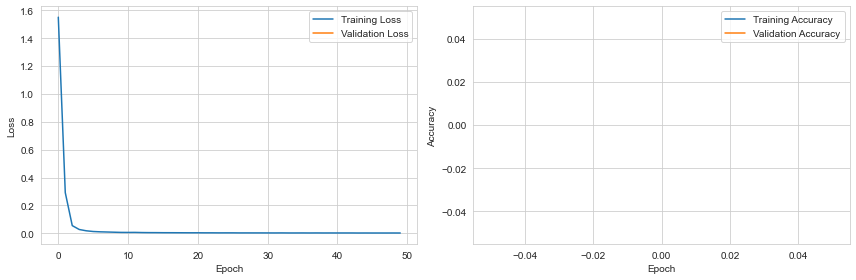

In [71]:
# Plot the loss vs. accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
training = pd.read_csv('scenarios_to_run.csv')

model = tf.keras.models.load_model('Surrogate_LUTO_Model')

scaler = MinMaxScaler()
X_train = scaler.fit_transform(training.drop(['X','Y','rid','Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)'], axis=1))
y_train = training[['Agriculture', 'Carbon Planting', 'Environmental Plantings',
           'Wheat Biofuels','Wheat (Food, Biofuels)','Wheat (Food, Bioenergy)', 'Woody Perennials (Biofuels)', 'Woody Perennials (Bioenergy)']]
    
y_pred=model.predict(X_train)
y_train['preds'] = y_pred.argmax(axis=1)
    
dict = {0 : 5.0, 1:101.0, 2:102.0,
               3:103.0, 4:104.0,
               5:105.0, 6:106.0, 7:107.0}

y_train=y_train.replace({"preds": dict})
done = training[['X','Y','rid']]
done['preds'] = y_train['preds']
in_nlum_fnv = 'WinterLegumes Confidence.tif'
out_fn = 'Wheat_Biofuels Confidence.tif'
geometry = [Point(xy) for xy in zip(done.X, done.Y)]
output_data = done.drop(['X', 'Y','rid'], axis=1)
gdf = gpd.GeoDataFrame(output_data, crs="EPSG:4283", geometry=geometry)
# gdf.plot(column='Predicted')
rst = rasterio.open(in_nlum_fnv)
meta = rst.meta.copy()
meta.update(compress='lzw')
with rasterio.open(out_fn, 'w+', **meta) as out:
    out_arr = out.read(1)
    shapes = ((geom,value) for geom, value in zip(gdf.geometry, gdf['preds'].astype(int)))
    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform, default_value=1)
    out.write_band(1, burned)               